# Week 2 - Classical ML Models

## 0. Introduction to Scikit-learn

Started as a Google Summer of Code project in 2007, **scikit-learn** is one of the most popular machine learning libraries today. It provides efficient implementations of the ML models we will be taking a look at this week, as well as various other utility methods that you might need at every stage of an end-to-end machine learning project, from preprocessing and model evaluation to hyperparameter optimisation. Below is an overview of the functionalities provided by scikit-learn:

In [1]:
# Sample Datasets 
from sklearn.datasets import load_wine, load_iris #...

# Feature Engineering 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder # ...
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer # examples for text
from sklearn.feature_selection import SelectFromModel, VarianceThreshold # ...
from sklearn.decomposition import PCA, TruncatedSVD # ...

# Data Split and Parameter Tuning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, ShuffleSplit # ...

# Evaluation
from sklearn.metrics import recall_score, precision_score, roc_auc_score, f1_score, roc_curve # ...

# ML Algorithms (We'll cover some of these this week!)
from sklearn.ensemble import RandomForestClassifier, VotingRegressor, AdaBoostClassifier,  StackingClassifier # ...
from sklearn.linear_model import LinearRegression, LogisticRegression # ...
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB # ...
from sklearn.neighbors import NearestNeighbors, NearestCentroid # ...
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR # ...
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # ...
from sklearn.cluster import SpectralClustering, AgglomerativeClustering, SpectralBiclustering # ...

# Utilities
from sklearn.pipeline import Pipeline, make_pipeline # ...
from sklearn.impute import SimpleImputer # ...
from sklearn.compose import ColumnTransformer # ...

# ...and more!

## 1. Evaluating and testing your model (and why we need train and test sets)

Last week we went through an example of how you might obtain the data and carry out some Exploratory Data Analysis (EDA) on it to gain a better idea of what you're going to be working with. Next, we might do well to consider how we might use this data to train a machine learning model, and importantly, to evalute its performance. Remember, the goal of your model is to give an accurate prediction for data it has never seen before.

Let's go through a simple example of using a machine learning model for classification and see how we might evaluate our model:

In [2]:
import pandas as pd
import numpy as np 

from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

RANDOM_STATE = 42

In [3]:
wine = load_wine()

# Target classes
print({idx: value for (idx, value) in enumerate(wine.target_names)})

df = pd.DataFrame(wine.data, columns = wine.feature_names)
df['target'] = wine.target
df.sample(n=5, random_state=RANDOM_STATE)

{0: 'class_0', 1: 'class_1', 2: 'class_2'}


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0,0
45,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0,0
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0,2
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0,0
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0,1


Now, let's use all of our data to train a simple `DecisionTreeClassifier` from `scikit-learn` and use the trained model to predict on the same data:

In [4]:
X, y = wine.data, wine.target
print(X.shape) # we have 178 rows of data with 13 columns (features)

(178, 13)


In [5]:
model = DecisionTreeClassifier(random_state=RANDOM_STATE)

In [6]:
model.fit(X,y)

pred = model.predict(X)

print(f"Prediction accuracy: {accuracy_score(y,pred):.2f}")

Prediction accuracy: 1.00


We get a prediction accuracy of 100%! Are we done here?

Not quite yet. If we trained a model on 100% of our data and then tested it on the same data, we will not get an accurate representation of how well it will perform in the real world! It may very well be the case that your model, once deployed in production, performs poorly when it sees new, hitherto unseen data. 

Because we would like to gauge how well a model would perform in production before actually deploying it, we split our data into two non-overlapping sets: **training set** and **test set**. As you might have guessed, the model is trained using only the **training set** and thereafter tested using the **test set**. This way, we can get a sense of how well the model we've trained is able to *generalize*. 

Let us now split the dataset into **training** and **test** sets manually. To do so, we define a function called `split_train_test()` that takes in an iterable `X` for the data and `y` for the labels, as well as an optional `train_size` parameter defining the proportion of the dataset to include in the training set and finally `random_state`, the random seed that allows us to obtain the same splits for multiple runs. It returns a list of `numpy` arrays of the X and y splits.

In [7]:
def split_train_test(X, y, train_size=0.8, random_state=RANDOM_STATE):
    np.random.seed(random_state) 
    X = np.array(X)
    y = np.array(y)
    indices = np.random.permutation(len(X))
    train_size = int(train_size * len(X))
    train_idx = indices[:train_size]
    test_idx = indices[train_size:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

Now let's check that the function is working as expected:

In [8]:
X_train, X_test, y_train, y_test = split_train_test(X,y)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (142, 13)
X_test shape:  (36, 13)
y_train shape:  (142,)
y_test shape:  (36,)


Instead of writing our own function, we can use scikit-learn's `train_test_split()` method, which pretty much does the same thing as our little function above when `shuffle=True` (which is the default). It also supports scipy-sparse matrices and pandas dataframes as inputs, and has an option to *stratify* the data (which we will get to in a bit). Here is the signature for the `train_test_split()` method:

`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)`

Let's use this method instead to generate our splits:

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (142, 13)
X_test shape:  (36, 13)
y_train shape:  (142,)
y_test shape:  (36,)


And now let's evaluate our model on the test set and see what we get:

In [10]:
model.fit(X_train, y_train)

pred = model.predict(X_test)

print(f"Prediction accuracy: {accuracy_score(y_test, pred):.2f}")

Prediction accuracy: 0.94


As you can see, we only got a 94% accuracy when we used the test set to evaluate our model's performance. 

### 1.1 Cross-validation

So far, we only used the **training** and **test** sets, and managed to reach 94% accuracy on the test set with a decision tree model. We now want to reach for better performance with our model. Of course, we could choose a different type of model (e.g. SVM classifier) but let us stick to decision trees for now, as there are many things we can still try with decision trees. 

Scikit-learn's `DecisionTreeClassifier` has many hyperparameters you can tune. If you are familiar with the implementation of decision trees, you'll know that you can use different criteria for splitting the dataset at each node of the tree. Scikit-learn allows us to choose between `gini` for splitting based on Gini impurity and `entropy` for splitting based on the amount of information gain (the details of what these mean aren't too important here). There are also other hyperparameters you can specify, such as the maximum depth of the tree generated (`max_depth`), and the minimum number of instances that each leaf node in the tree can contain (`min_samples_leaf`), and more.

How do we choose the best hyperparameters for our decision tree? One way we can do this is by training multiple instances of our model and evaluating individual performance against the test set. However, there is a problem with this methodology: there is a risk of us overfitting the model on the particular test set used, by trying to optimise our model hyperparameters such that it obtains the best results on our choice of the test set. As machine learning practitioners, the **test set** should be hidden from us until we evaluate our choices and decide on the model to use.

One way we can solve this problem is to hold out a separate, third set known as the **validation set** (sometimes also called the *development set*) which we use to evaluate and select the best model. The validation set is obtained from a small proportion of the **training set** and therefore the data we have available for training the model is reduced.  

The problem with this approach, however, is that we have to decide the appropriate size of the validation set, the choice of which also depends on the size of the training data available (e.g. if validation set is too large and we have limited training data, our model will be suboptimal. Similarly, too small a validation set and the validation result may not be accurate). Furthermore, just like when we used the test set to select the best hyperparameters for our model, we become prone to **overfitting** the validation set since the validation set is generated at the start and remains constant throughout the hyperparameter optimisation process. 

In practice, therefore, we use a technique called cross-validation (CV).

### 1.2 K-Fold Cross-Validation

In a *k*-fold CV, we split the original training set into K non-overlapping parts. For a total of K iterations, we use different (K-1) parts each time for training the model, and evaluate the trained model on the single subset that was not used (each subset is used once, which is why we have K iterations). Therefore, we essentially use *k* instances of different, non-overlapping validation sets to evaluate our model. The performance metrics for the model is the averaged result for K iterations. This gives us a better measure of the model's performance, though at the cost of increased training time. Below is a figure from scitkit-learn's website illustrating how k-fold CV works ([source](https://scikit-learn.org/stable/modules/cross_validation.html)).

<p align="center">
     <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="K-fold cross-validation" style="height:400px" />
</p>

Once again, `scikit-learn` has an implementation of k-fold CV, although it wouldn't be too difficult to implement it on your own. If you want to challenge yourself, try implementing it yourself! For now, we'll use the `KFold` method provided for us by `scikit-learn`. Let's first test it on a small dataset:

In [11]:
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit

X_small = ["one", "two", "three", "four", "five", "six"]
kf = KFold(n_splits=3) # form 3 non-overlapping partitions containing 2 elements each

for train_idx, test_idx in kf.split(X_small):
    print(f"{train_idx}, {test_idx}")

[2 3 4 5], [0 1]
[0 1 4 5], [2 3]
[0 1 2 3], [4 5]


Now let's use it on our original dataset and visualise the results:

In [12]:
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

# Modified from https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html
def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        sc = ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    clset = [(1,'Validation set'), (0,'Training set')]
    handles = [plt.plot([],color=sc.get_cmap()(sc.norm(c)),ls="", marker="o")[0] for c,l in clset ]
    labels = [l for c,l in clset]
    ax.legend(handles, labels, bbox_to_anchor=(1.04,1), loc="upper left")


    # Plot the data classes only
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class']
    ax.set(yticks=np.arange(n_splits+1) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+1.2, -.2], xlim=[0, len(X)])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

<AxesSubplot:title={'center':'KFold'}, xlabel='Sample index', ylabel='CV iteration'>

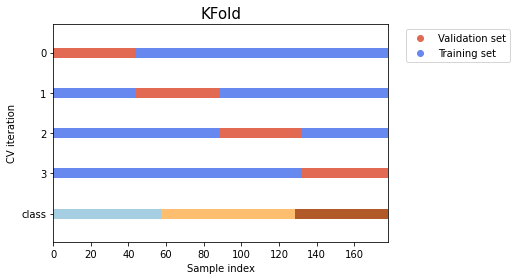

In [13]:
n_splits = 4

fig, ax = plt.subplots()

cv = KFold(n_splits)

plot_cv_indices(cv, X, y, ax, n_splits)

## 3.2 Cross-validation with ShuffleSplit

Another way we can do k-fold cross-validation is with `ShuffleSplit` from `scitkit-learn`. As the name suggests, `ShuffleSplit` will yield random indices to split the data into two training and test / validation sets, according to the `test_size` and `train_size` parameters. In fact, the `train_test_split()` method we used earlier is basically a wrapper around `next(ShuffleSplit().split(X, y))`. One caveat with `ShuffleSplit` is that the folds are not guaranteed to be non-overlapping since they are randomly drawn, though this shouldn't be a problem if your dataset is sufficiently large. 

Now, let's visualise `ShuffleSplit`:


<AxesSubplot:title={'center':'ShuffleSplit'}, xlabel='Sample index', ylabel='CV iteration'>

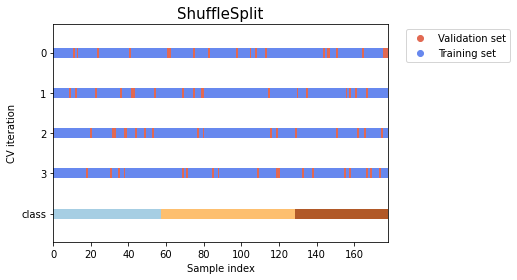

In [14]:
fig, ax = plt.subplots()

cv = ShuffleSplit(n_splits)

plot_cv_indices(cv, X, y, ax, n_splits)

### 1.3 Stratified Cross-validation

Earlier, when using `KFold` with `k=4`, we effectively evaluated our model on 4 completely different validation sets. However, you might have noticed that the 3 target classes are not evenly distributed across our 4 validation sets! For example, notice how all the instances in our first validation set are from the class represented by a *light blue* color. The same goes for the last validation set, which only contains instances belonging to the brown-colored class. In other words, we have introduced significant **sampling bias**. Ideally, we want the distribution of classes in our validation and training sets in each iteration to be representative of that of the original whole dataset.

To achieve this, we use what's called **stratified sampling**, where the percentage of samples in each class is manintained to be more or less the same as the ratio in the original dataset. Conveniently, `scikit-learn` provides us with the stratified variants of the splitting strategies we explored thus far: `StratifiedKFold` and `StratifiedShuffleSplit`. 

Let's now visualise these strategies and how they differ from the non-stratified variants:

<AxesSubplot:title={'center':'StratifiedKFold'}, xlabel='Sample index', ylabel='CV iteration'>

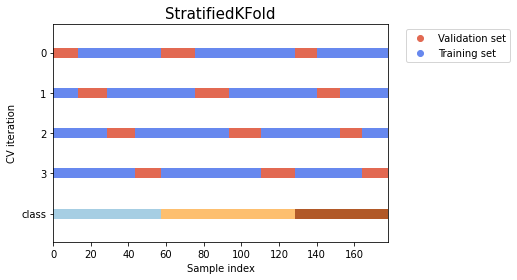

In [15]:
fig, ax = plt.subplots()
cv = StratifiedKFold(n_splits)
plot_cv_indices(cv, X, y, ax, n_splits)

In the figure above, it is clear that the validation and training sets in each iteration now maintains the ratio of the classes in the dataset.

<AxesSubplot:title={'center':'StratifiedShuffleSplit'}, xlabel='Sample index', ylabel='CV iteration'>

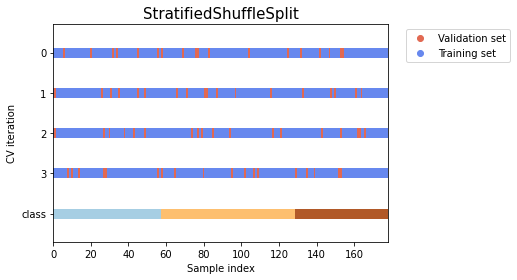

In [16]:
fig, ax = plt.subplots()
cv = StratifiedShuffleSplit(n_splits)
plot_cv_indices(cv, X, y, ax, n_splits)

Now recall that the `train_test_split()` method we saw earlier had a `stratify` parameter in its method signature that was set to `None` by default. If we call the method with `stratify=y` instead, it will make sure that the proportion of target classes in the training and test sets will be the same as their proportion in `y`. 

### 1.4 Tying things up

To tie things up with our example, let's use cross-validation to search for the best hyperparameters for our `DecisionTreeClassifer` to obtain a better accuracy on the test set. Here, we use `GridSearchCV` to search the space of potential hyperparameters and find the ones that give the best results. `GridSearchCV` uses cross-validation internally to evaluate the results, storing the best parameters found in the `best_params_` variable of the `GridSearchCV` object.

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    { 
        'criterion': ['gini', 'entropy'], 
        'splitter': ['best','random'], 
        'max_depth': [3,6,7,8,9,10], 
        'max_features': [2,4,7,8,9,10], 
        'min_samples_split': [2, 3, 4]
    }
]

model = DecisionTreeClassifier(random_state=RANDOM_STATE)

grid_search = GridSearchCV(model, param_grid, cv=5, return_train_score=True)

grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [3, 6, 7, 8, 9, 10],
                          'max_features': [2, 4, 7, 8, 9, 10],
                          'min_samples_split': [2, 3, 4],
                          'splitter': ['best', 'random']}],
             return_train_score=True)

In [18]:
grid_search.best_score_, grid_search.best_params_

(0.9212698412698412,
 {'criterion': 'gini',
  'max_depth': 6,
  'max_features': 10,
  'min_samples_split': 3,
  'splitter': 'random'})

In [19]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=6, max_features=10, min_samples_split=3,
                       random_state=42, splitter='random')

In [20]:
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

pred = best_model.predict(X_test)

print(f"Prediction accuracy: {accuracy_score(y_test, pred):.2f}")

Prediction accuracy: 0.97
